In [1]:
import numpy as np
import pandas as pd 
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../datasets/clean_dataset.csv')
df.head()

,make,vehicle_class,engine_liters,cylinders,transmission_type,fuel_type,fuel_city_l_100km,fuel_hwy_l_100km,fuel_comb_l_100km,fuel_comb_mpg,co2_emission,co2_rating,smog_rating
0,0,7,3.5,6,8,3,12.6,9.4,11.2,25.0,263.0,4.0,5.0
1,0,7,2.0,4,8,3,11.0,8.6,9.9,29.0,232.0,5.0,6.0
2,0,7,2.0,4,8,3,11.3,9.1,10.3,27.0,242.0,5.0,6.0
3,0,0,2.0,4,8,3,11.2,8.0,9.8,29.0,230.0,5.0,7.0
4,0,0,2.0,4,8,3,11.3,8.1,9.8,29.0,231.0,5.0,7.0


In [3]:
x = df.drop(columns=['co2_emission']).values  # Features (all columns except 'price')
y = df['co2_emission'].values

In [4]:
class ANN(nn.Module):


    def __init__(self,input_dim):
        super(ANN,self).__init__()
        self.model=nn.Sequential(
            nn.Linear(input_dim,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8,1)

        )

    def forward(self,x):
        return self.model(x)


In [5]:
# Convert to PyTorch tensors (float32 for model input)
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [6]:
from sklearn.model_selection import train_test_split

# 1. Split into train and test
x_train, x_test, y_train, y_test = train_test_split(
    x_tensor, y_tensor, test_size=0.2, random_state=42
)

In [12]:
input_dim=x_train.shape[1]
model=ANN(input_dim)

criterion=nn.MSELoss()
optimiser=optim.Adam(model.parameters(),lr=0.001)


In [14]:
epochs=300

errors=[]

for epoch in range(epochs):
    model.train()
    outputs=model(x_train)
    loss=criterion(outputs.squeeze(),y_train)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    errors.append([epoch+1, loss])

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")





Epoch [10/300], Loss: 1604.5297
Epoch [20/300], Loss: 1417.2473
Epoch [30/300], Loss: 1249.5424
Epoch [40/300], Loss: 1101.2379
Epoch [50/300], Loss: 971.6033
Epoch [60/300], Loss: 859.4442
Epoch [70/300], Loss: 763.5678
Epoch [80/300], Loss: 682.8280
Epoch [90/300], Loss: 615.4682
Epoch [100/300], Loss: 559.4247
Epoch [110/300], Loss: 513.0593
Epoch [120/300], Loss: 474.6539
Epoch [130/300], Loss: 442.6970
Epoch [140/300], Loss: 415.9017
Epoch [150/300], Loss: 393.2053
Epoch [160/300], Loss: 373.8651
Epoch [170/300], Loss: 357.2314
Epoch [180/300], Loss: 342.7635
Epoch [190/300], Loss: 330.0583
Epoch [200/300], Loss: 318.8114
Epoch [210/300], Loss: 308.7984
Epoch [220/300], Loss: 299.8391
Epoch [230/300], Loss: 291.7709
Epoch [240/300], Loss: 284.4889
Epoch [250/300], Loss: 277.9093
Epoch [260/300], Loss: 271.9484
Epoch [270/300], Loss: 266.5093
Epoch [280/300], Loss: 261.5219
Epoch [290/300], Loss: 256.9673
Epoch [300/300], Loss: 252.7892


In [18]:
epochs_list, loss_values = zip(*errors)

In [21]:
loss_values=torch.tensor(loss_values).numpy()


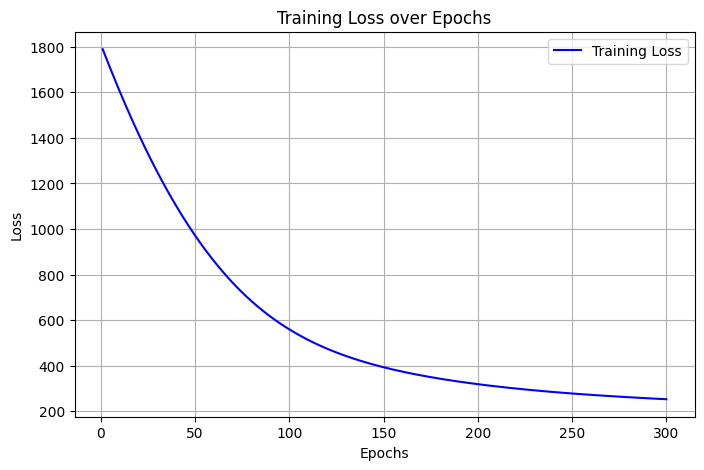

In [22]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs_list, loss_values, label='Training Loss', color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.legend()
plt.show()

[113. 192. 186. 255. 321.]
[155.06837 200.43    181.73781 251.93373 306.0801 ]
Train R² Score: 0.9280
Test R² Score:  0.9220


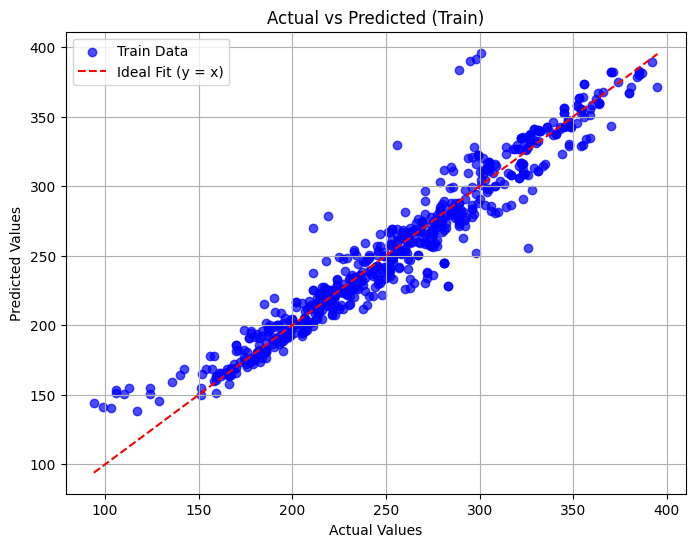

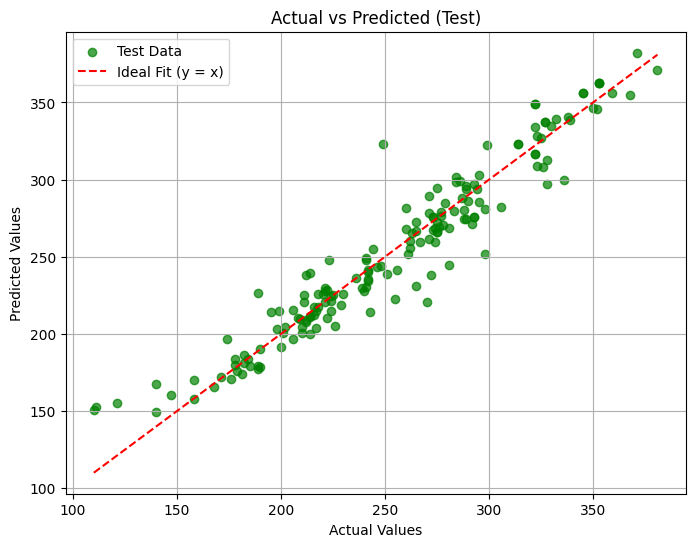

In [25]:
from sklearn.metrics import r2_score

# Put model in evaluation mode
model.eval()

with torch.no_grad():
    # Get predictions
    y_train_pred = model(x_train).squeeze()
    y_test_pred = model(x_test).squeeze()

    # Convert to NumPy arrays for sklearn
    y_train_np = y_train.numpy()
    y_train_pred_np = y_train_pred.numpy()

    y_test_np = y_test.numpy()
    y_test_pred_np = y_test_pred.numpy()

    print(y_train_np[:5])
    print(y_train_pred_np[:5])

    # Calculate R² Scores
    r2_train = r2_score(y_train_np, y_train_pred_np)
    r2_test = r2_score(y_test_np, y_test_pred_np)

    print(f"Train R² Score: {r2_train:.4f}")
    print(f"Test R² Score:  {r2_test:.4f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_train_np, y_train_pred_np, alpha=0.7, color='blue', label='Train Data')

    # Plot y = x reference line
    plt.plot([y_train_np.min(), y_train_np.max()],
            [y_train_np.min(), y_train_np.max()],
            'r--', label='Ideal Fit (y = x)')

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted (Train)')
    plt.legend()
    plt.grid(True)
    plt.show()


    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_np, y_test_pred_np, alpha=0.7, color='green', label='Test Data')
    plt.plot([y_test_np.min(), y_test_np.max()],
            [y_test_np.min(), y_test_np.max()],
            'r--', label='Ideal Fit (y = x)')

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted (Test)')
    plt.legend()
    plt.grid(True)
    plt.show()